In [1]:
import torch
import torchvision.transforms as transforms              
from torchvision.datasets import ImageFolder
import torchvision.models as models
from torchvision.models import Inception_V3_Weights
from torch.utils.data import DataLoader
import numpy as np
from torch.utils.data import Subset
from src.temperature_scaling import ModelWithTemperature
from src.imagenet_real import aps_imagenet_real_hist, raps_imagenet_real_hist, saps_imagenet_real_hist, aps_imagenet_real_scatter, raps_imagenet_real_scatter, saps_imagenet_real_scatter

# load pre-trained model InceptionV3 and set mode
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.inception_v3(weights=Inception_V3_Weights.IMAGENET1K_V1).to(device)

#  Reprocess: Center Crop and then resize to 299*299
data_transform = transforms.Compose([
    transforms.CenterCrop(299),
    transforms.Resize(299), 
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
])

sorted_val_path = "D:\\Download\\ImageNet-1K\\Validation_Set\\sorted_ImageNet_val"
dataset = ImageFolder(root=sorted_val_path, transform=data_transform)

# Temperature Scaling
model.eval() # only use output.logits of Inception's output
subset_size = len(dataset) // 10
indices = np.random.choice(len(dataset), subset_size, replace=False)
subset_dataset = Subset(dataset, indices)
train_loader = DataLoader(subset_dataset, batch_size=32, shuffle=False, num_workers=4)

model = ModelWithTemperature(model, temperature = 1.0).to(device)
model.set_temperature(train_loader)
model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.05

Before temperature - NLL: 1.076, ECE: 0.015
Optimal temperature: 0.966
After temperature - NLL: 1.067, ECE: 0.024


APS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9392 ± 0.0014
Final Average Prediction Set Size: 113.07 ± 2.86
Final Average Coverage: 0.9497 ± 0.0026
Final Average Real Probability: 0.8889 ± 0.0036


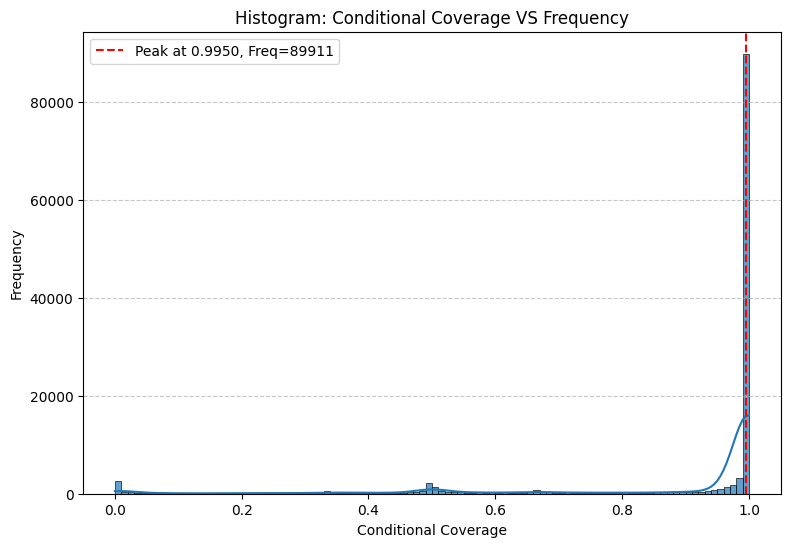

89911 (72.30%) samples reached the peak conditional coverage at 0.9950


In [2]:
aps_imagenet_real_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

RAPS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9628 ± 0.0013
Final Average Prediction Set Size: 11.61 ± 0.16
Final Average Coverage: 0.9500 ± 0.0022
Final Average Real Probability: 0.8758 ± 0.0036


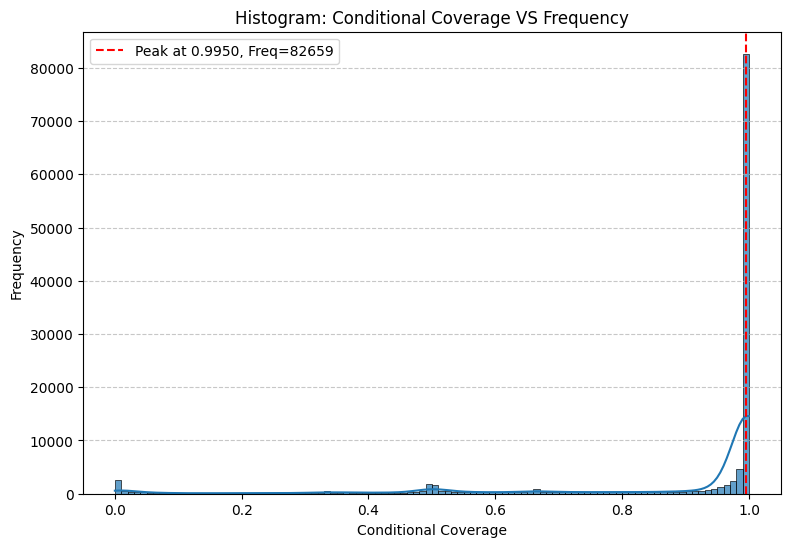

82659 (66.47%) samples reached the peak conditional coverage at 0.9950


In [3]:
raps_imagenet_real_hist(model, dataset, device, lambda_=0.02, k_reg=15, num_runs=10, alpha=0.05, is_ground_truth=False)

SAPS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 2.1698 ± 0.0380
Final Average Prediction Set Size: 7.99 ± 0.19
Final Average Coverage: 0.9500 ± 0.0015
Final Average Real Probability: 0.8690 ± 0.0029


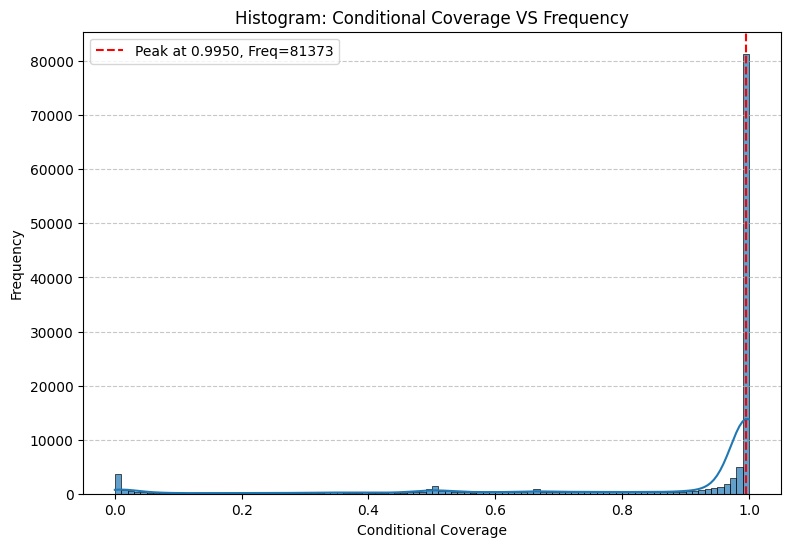

81373 (65.43%) samples reached the peak conditional coverage at 0.9950


In [4]:
saps_imagenet_real_hist(model, dataset, device, lambda_=0.2, num_runs=10, alpha=0.05, is_ground_truth=False)

APS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9392 ± 0.0014
Final Average Prediction Set Size: 113.07 ± 2.86
Final Average Coverage: 0.9497 ± 0.0026
Final Average Real Probability: 0.8889 ± 0.0036


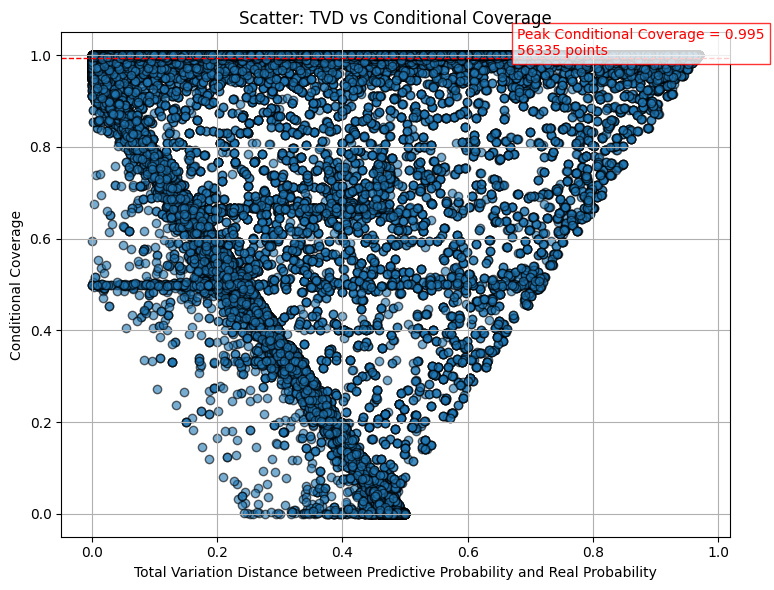

Peak Conditional Coverage = 0.995, with 56335 samples

=== Count Regions Summary ===
39674 (31.9%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
30675 (24.7%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
19500 (15.7%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.82155', '0.04365', '0.03283', '0.01590', '0.00195', '0.00169', '0.00149', '0.00116', '0.00103', '0.00092', '0.00090', '0.00076', '0.00068', '0.00067', '0.00066', '0.00061', '0.00057', '0.00056', '0.00055', '0.00054', '0.00051', '0.00051', '0.00049', '0.00048', '0.00047', '0.00045', '0.00045', '0.00043', '0.00042', '0.00039', '0.00037', '0.00036', '0.00034', '0.00034', '0.00034', '0.00034', '0.00033', '0.00033', '0.00032', '0.00030', '0.00030', '0.00030', '0.00030', '0.00029', '0.00028', '0.00027', '0.00027', '0.00027', '0.00027', '0.00026', '0.00026']
  Real Probability Set      : ['0.89350', '0.

In [5]:
aps_imagenet_real_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9628 ± 0.0013
Final Average Prediction Set Size: 11.61 ± 0.16
Final Average Coverage: 0.9500 ± 0.0022
Final Average Real Probability: 0.8758 ± 0.0036


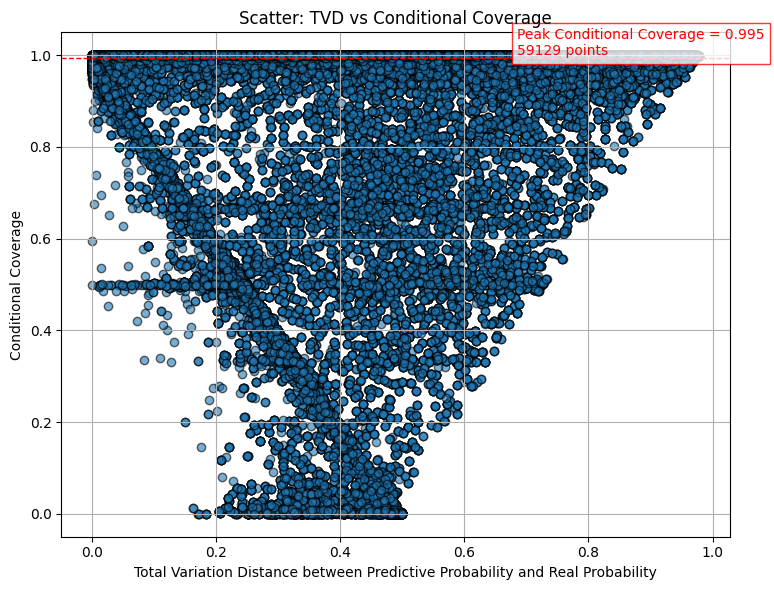

Peak Conditional Coverage = 0.995, with 59129 samples

=== Count Regions Summary ===
46031 (37.0%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
31872 (25.6%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
19875 (16.0%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.91640', '0.01476', '0.00119', '0.00096', '0.00080', '0.00073', '0.00062', '0.00049', '0.00041', '0.00041', '0.00039', '0.00036', '0.00035', '0.00035', '0.00031', '0.00031']
  Real Probability Set      : ['0.99952', '0.00048', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.91284', '0.06931']
  Real Probability Set      : ['0.98164', '0.01770']
Sample 3:
  Predictive Probability Set: ['0.89568', '0.04594', '0.02325']
  Real Probability Set      : ['0

In [6]:
raps_imagenet_real_scatter(model, dataset, device, lambda_=0.02, k_reg=15, num_runs=10, alpha=0.05)

SAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 2.1698 ± 0.0380
Final Average Prediction Set Size: 7.99 ± 0.19
Final Average Coverage: 0.9500 ± 0.0015
Final Average Real Probability: 0.8690 ± 0.0029


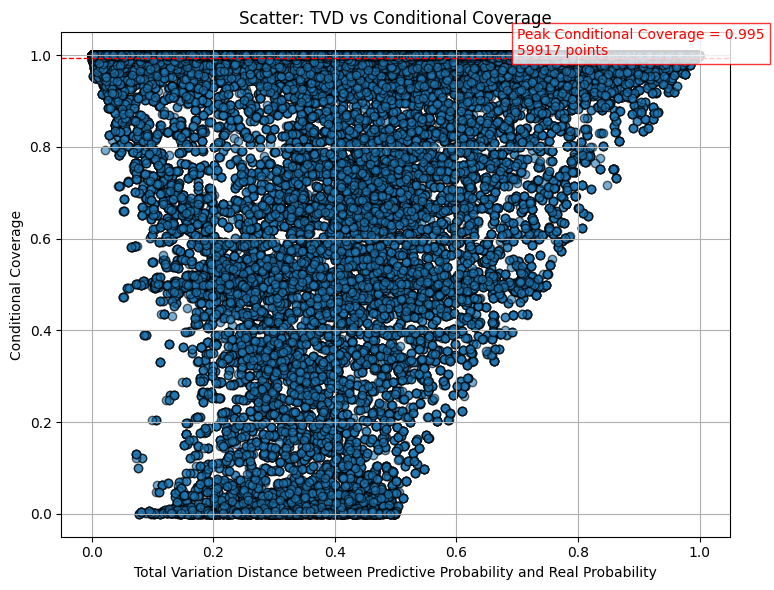

Peak Conditional Coverage = 0.995, with 59917 samples

=== Count Regions Summary ===
50465 (40.6%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
29580 (23.8%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
20333 (16.3%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.58007', '0.41899', '0.00003', '0.00003', '0.00002', '0.00001', '0.00001', '0.00001', '0.00001']
  Real Probability Set      : ['0.50001', '0.49999', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.97370', '0.00170', '0.00062', '0.00033', '0.00032', '0.00020', '0.00018', '0.00018']
  Real Probability Set      : ['0.99948', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.92869', '0.00765', '0.00314', '0.00309', '0.00300', '0.00160', '0.00135']
  Real Prob

In [7]:
saps_imagenet_real_scatter(model, dataset, device, lambda_=0.2, num_runs=10, alpha=0.05)